### Polynomial Regression

Polynomial regression is a type of regression analysis where the relationship between the independent variable(s) and the dependent variable is modeled as an nth-degree polynomial. It is an extension of linear regression that allows you to model more complex, nonlinear relationships between the predictors and the outcome

### imports

In [555]:
import pandas as pd 
import numpy  as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api  as sm
from sklearn.linear_model import LinearRegression 

Below we demonstrate some examples using a polynomial of degree 2, also called a quadratic function, which is represented in the form y = a x 2 + b x + c .

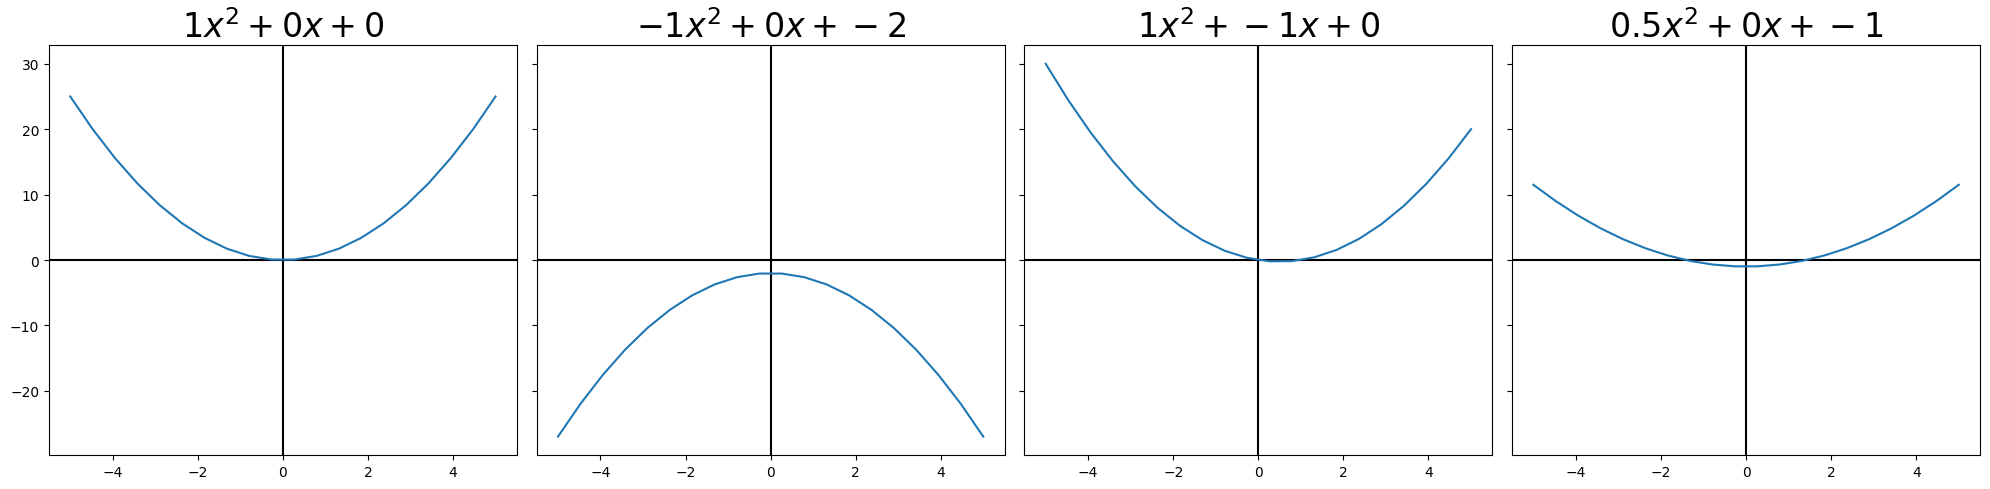

In [556]:
fig, axes = plt.subplots(ncols=4, figsize=(20,5), sharey=True)

coefficients = (
    (1, 0, 0),
    (-1, 0, -2),
    (1, -1, 0),
    (0.5, 0, -1)
)
x = np.linspace(-5, 5, 20)
for i, (a, b, c) in enumerate(coefficients):
    ax = axes[i]
    ax.axhline(0, color="black")
    ax.axvline(0, color="black")
    ax.plot(x, a * x**2 + b * x + c)
    ax.set_title(f"${a}x^2 + {b}x + {c}$", {"fontsize": 24})

fig.tight_layout()

In [557]:
def print_results(sk_model,ols_model):
    print(f"""

StatsModels intercept:    {ols_model.params["const"]}
scikit-learn intercept:   {sk_model.intercept_}

StatsModels coefficient:\n{ols_model.params}
scikit-learn coefficient: {sk_model.coef_}
""")

In [558]:
def build_ols_sk_model(X,y,poly=False):
    
    if poly:
        ols_model = sm.OLS(y,X)
        ols_results = ols_model.fit()
    else:
        ols_model = sm.OLS(y,sm.add_constant(X))
        ols_results = ols_model.fit()
        
    sk_model = LinearRegression()
    sk_results = sk_model.fit(X=X,y=y)
    
    print_results(sk_results,ols_results)
    
    return (ols_results,sk_results)

## load Data

In [559]:
df = pd.read_csv("./data/yield.csv", sep='\s+', index_col=0)

df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_5657/4018739900.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("./data/yield.csv", sep='\s+', index_col=0)


,Temp,Yield
i,,
1,50,3.3
2,50,2.8
3,50,2.9
4,50,3.2
5,60,2.7


In [560]:
df = df.astype(float)
df.head()

,Temp,Yield
i,,
1,50.0,3.3
2,50.0,2.8
3,50.0,2.9
4,50.0,3.2
5,60.0,2.7


### Define target and Predictor

In [561]:
y =  df["Yield"]
x = df[["Temp"]]

In [562]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 1 to 21
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    21 non-null     float64
 1   Yield   21 non-null     float64
dtypes: float64(2)
memory usage: 504.0 bytes


<Axes: xlabel='Temp', ylabel='Yield'>

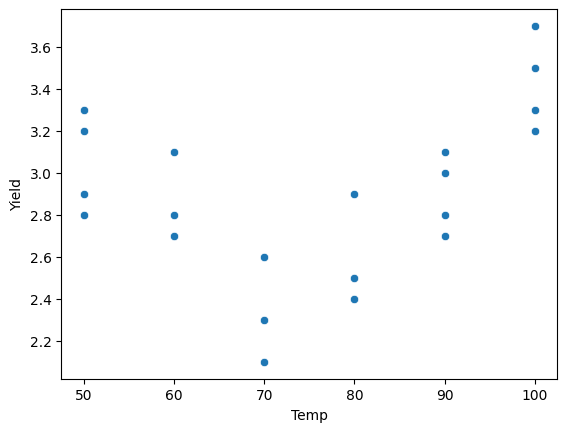

In [563]:
sns.scatterplot(x=df["Temp"],y=df["Yield"])

### regplot

<Axes: xlabel='Temp', ylabel='Yield'>

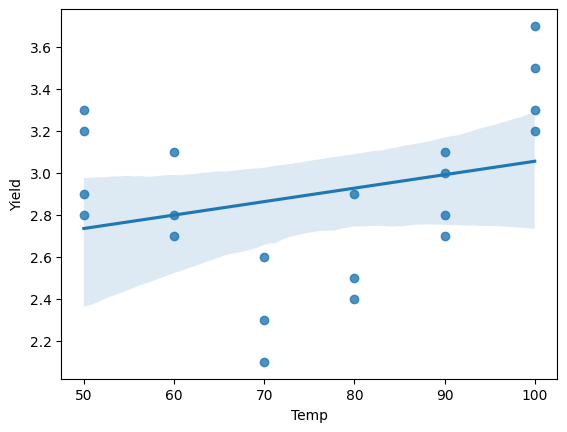

In [564]:
sns.regplot(x=df["Temp"],y=df["Yield"])

## Modeling 

### Linear regression

In [565]:
ols_base_results,sk_base_results = build_ols_sk_model(X=x,y=y)

ols_base_results.rsquared



StatsModels intercept:    2.415106382978722
scikit-learn intercept:   2.4151063829787236

StatsModels coefficient:
const    2.415106
Temp     0.006404
dtype: float64
scikit-learn coefficient: [0.00640426]



np.float64(0.08605718085106362)

In [566]:
X_poly_2 = x.copy()

X_poly_2["Temp^2"] = X_poly_2["Temp"]**2 

X_poly_2.head()

,Temp,Temp^2
i,,
1,50.0,2500.0
2,50.0,2500.0
3,50.0,2500.0
4,50.0,2500.0
5,60.0,3600.0


### Polynomial Regresion  X ^2

In [567]:
ols_poly_2_results,sk_poly_2_results =  build_ols_sk_model(X_poly_2,y)

ols_poly_2_results.rsquared



StatsModels intercept:    8.817530679756713
scikit-learn intercept:   8.817530679756707

StatsModels coefficient:
const     8.817531
Temp     -0.174928
Temp^2    0.001211
dtype: float64
scikit-learn coefficient: [-0.17492765  0.0012106 ]



np.float64(0.6948165884110546)

### Higher-Order Relationships

The use of polynomials is not restricted to quadratic relationships. You can explore cubic or higher order relationships as well!

In [568]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(8)
X_poly_high = poly.fit_transform(x)
X_poly_high

array([[1.0000000e+00, 5.0000000e+01, 2.5000000e+03, 1.2500000e+05,
        6.2500000e+06, 3.1250000e+08, 1.5625000e+10, 7.8125000e+11,
        3.9062500e+13],
       [1.0000000e+00, 5.0000000e+01, 2.5000000e+03, 1.2500000e+05,
        6.2500000e+06, 3.1250000e+08, 1.5625000e+10, 7.8125000e+11,
        3.9062500e+13],
       [1.0000000e+00, 5.0000000e+01, 2.5000000e+03, 1.2500000e+05,
        6.2500000e+06, 3.1250000e+08, 1.5625000e+10, 7.8125000e+11,
        3.9062500e+13],
       [1.0000000e+00, 5.0000000e+01, 2.5000000e+03, 1.2500000e+05,
        6.2500000e+06, 3.1250000e+08, 1.5625000e+10, 7.8125000e+11,
        3.9062500e+13],
       [1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07, 7.7760000e+08, 4.6656000e+10, 2.7993600e+12,
        1.6796160e+14],
       [1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07, 7.7760000e+08, 4.6656000e+10, 2.7993600e+12,
        1.6796160e+14],
       [1.0000000e+00, 6.0000000e+01, 3.

In [569]:
x_poly_high_df = pd.DataFrame(X_poly_high,columns=poly.get_feature_names_out(x.columns),index=x.index)
x_poly_high_df

,1,Temp,Temp^2,Temp^3,Temp^4,Temp^5,Temp^6,Temp^7,Temp^8
i,,,,,,,,,
1,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,1.562500e+10,7.812500e+11,3.906250e+13
2,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,1.562500e+10,7.812500e+11,3.906250e+13
3,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,1.562500e+10,7.812500e+11,3.906250e+13
4,1.0,50.0,2500.0,125000.0,6250000.0,3.125000e+08,1.562500e+10,7.812500e+11,3.906250e+13
5,1.0,60.0,3600.0,216000.0,12960000.0,7.776000e+08,4.665600e+10,2.799360e+12,1.679616e+14
6,1.0,60.0,3600.0,216000.0,12960000.0,7.776000e+08,4.665600e+10,2.799360e+12,1.679616e+14
7,1.0,60.0,3600.0,216000.0,12960000.0,7.776000e+08,4.665600e+10,2.799360e+12,1.679616e+14
8,1.0,70.0,4900.0,343000.0,24010000.0,1.680700e+09,1.176490e+11,8.235430e+12,5.764801e+14
9,1.0,70.0,4900.0,343000.0,24010000.0,1.680700e+09,1.176490e+11,8.235430e+12,5.764801e+14


In [570]:
x_poly_high_df.drop("1",axis=1,inplace=True)

In [571]:
poly_results = sm.OLS(y, x_poly_high_df).fit()
poly_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     9.454
Date:                Wed, 27 Nov 2024   Prob (F-statistic):           0.000314
Time:                        11:45:01   Log-Likelihood:                 4.9027
No. Observations:                  21   AIC:                             2.195
Df Residuals:                      15   BIC:                             8.462
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Temp       -4.973e-06    4.4e-06     -1.130      0.276   -1.44e-05    4.41e-06
Temp^2        -0.0001   8.85e-05     -1.130      0.276      -0.000    8.86e-05
Temp^3        -0.0012      0.001     -1.130      0.276      -0.003       0.001
Temp^4      9.233e-05   7.27e-05      1.270      0.223   -6.26e-05       0.000
Temp^5     -2.699e-06   1.99e-06     -1.356      0.195   -6.94e-06    1.54e-06
Temp^6      3.784e-08   2.69e-08      1.409      0.179   -1.94e-08    9.51e-08
Temp^7     -2.578e-10   1.79e-10     -1.444      0.169   -6.38e-10    1.23e-10
Temp^8      6.866e-13   4.69e-13      1.465      0.164   -3.12e-13    1.69e-12
==============================================================================
Omnibus:                        9.264   Durbin-Watson:                   2.586
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                2.232
Skew:                           0.270   Prob(JB):                        0.328
Kurtosis:                       1.497   Cond. No.                     5.03e+28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.91e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [572]:
predeictions =  poly_results.predict(x_poly_high_df)

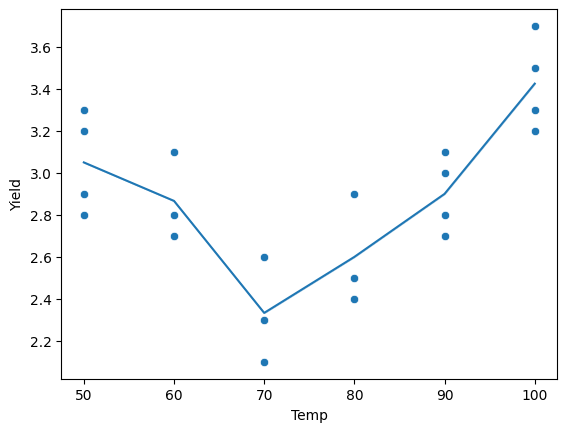

In [573]:
sns.scatterplot(x=df["Temp"],y=df["Yield"])
sns.lineplot(x=df["Temp"],y=predeictions)
plt.show()

In [574]:
from sklearn.metrics import mean_absolute_error

In [575]:
pred_poly_2 = sk_base_results.predict(x)

In [576]:
mean_absolute_error(y,pred_poly_2)

np.float64(0.300466058763931)

In [577]:

mean_absolute_error(y,predeictions)


np.float64(0.17620811445510864)